In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import random
seed = 12
np.random.seed(seed)

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 250)

from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv(r'C:\\Users\\ADMIN\\anaconda3\\Python\\telecom_churn_data.csv')

In [3]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
#lets check the dimensions of the dataframe
df.shape

(99999, 226)

In [5]:
# Let's see the type of each column
df.dtypes

mobile_number       int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
aon                 int64
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
sep_vbc_3g        float64
Length: 226, dtype: object

In [6]:
# let's look at the statistical aspects of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
aon,99999.0,1.219855e+03,954.733842,1.800000e+02,4.670000e+02,8.630000e+02,1.807500e+03,4.337000e+03
aug_vbc_3g,99999.0,6.817025e+01,267.580450,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.291622e+04
jul_vbc_3g,99999.0,6.683906e+01,271.201856,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.165600e+03
jun_vbc_3g,99999.0,6.002120e+01,253.938223,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.116621e+04


In [7]:
# check for duplicates
if(len(df) == len(df['mobile_number'].unique())):
    print("No duplicates found!!")
else:
    print("Duplicates occuring")

No duplicates found!!


In [8]:
#drop mobile number columns , as it is of not useful in prediciting churn values.
df.drop('mobile_number',axis=1,inplace=True)

In [9]:
singleValueColumns= []
for i in df.columns.to_list():
    if len(df[i].unique())==1:
        singleValueColumns.append(i)
singleValueColumns

['circle_id', 'last_date_of_month_6']

In [10]:
df.drop(singleValueColumns,axis=1,inplace=True)

In [11]:
#checking percentage for the null values
nullColumns=round(df.isnull().sum()*100/df.shape[0],2)
nullColumns=nullColumns[nullColumns>0]
nullColumns

loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_7     0.60
last_date_of_month_8     1.10
                        ...  
night_pck_user_9        74.08
fb_user_6               74.85
fb_user_7               74.43
fb_user_8               73.66
fb_user_9               74.08
Length: 166, dtype: float64

In [12]:
#Checking for columns having more than 50% of missing values
null50Columns=nullColumns[nullColumns>50]
null50Columns

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

In [13]:
#drop the columns having more than 50% NaN values (more than 50% missing values)
df.drop(null50Columns.index,axis=1,inplace=True)

In [14]:
df.shape

(99999, 183)

In [15]:
#checking percentage for the null values
nullColumns=round(df.isnull().sum()*100/df.shape[0],2)
nullColumns=nullColumns[nullColumns>0]
nullColumns

loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_7    0.60
last_date_of_month_8    1.10
                        ... 
ic_others_9             7.75
date_of_last_rech_6     1.61
date_of_last_rech_7     1.77
date_of_last_rech_8     3.62
date_of_last_rech_9     4.76
Length: 126, dtype: float64

In [16]:
CatCols = df.select_dtypes(include=[np.object])
CatCols.columns

Index(['last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9'],
      dtype='object')

In [17]:
#dropping columns consisting values as date format.
df.drop(CatCols.columns,axis=1,inplace=True)

In [18]:
df.shape

(99999, 176)

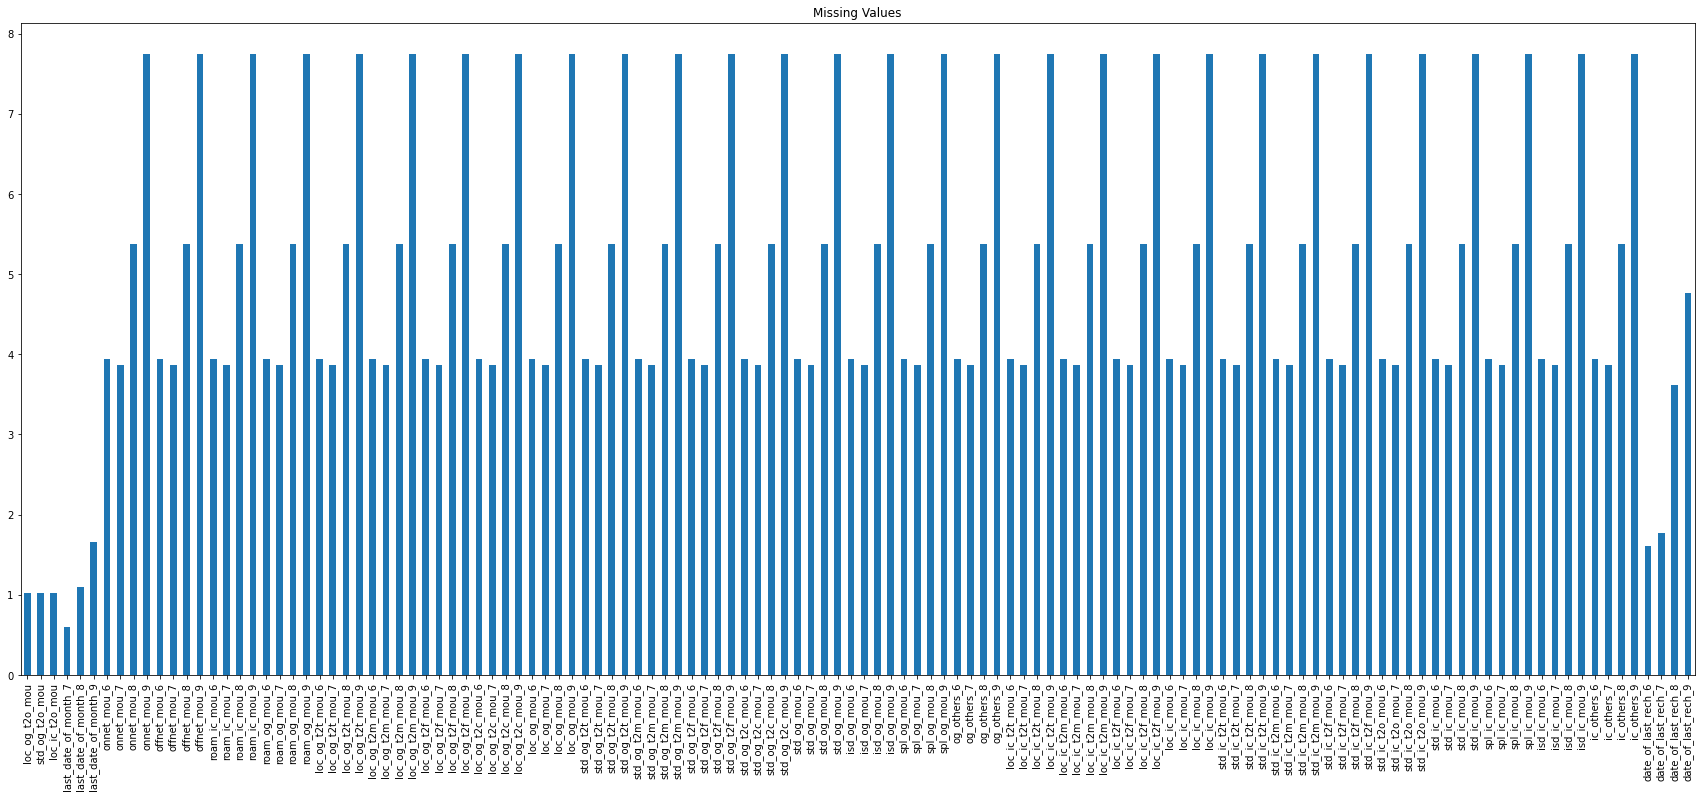

In [19]:
# plot missing values
nullColumns.plot(kind='bar',figsize=(30,12))
plt.title('Missing Values')
plt.show()

In [20]:
#checking percentage for the null values
nullColumns=round(df.isnull().sum()*100/df.shape[0],2)
nullColumns=nullColumns[nullColumns>0]
nullColumns

loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
onnet_mou_6       3.94
onnet_mou_7       3.86
                  ... 
isd_ic_mou_9      7.75
ic_others_6       3.94
ic_others_7       3.86
ic_others_8       5.38
ic_others_9       7.75
Length: 119, dtype: float64

In [21]:
df[nullColumns.index]

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9
0,0.0,0.0,0.0,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
1,0.0,0.0,0.0,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.00,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.90,0.00,14.84,15.01,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00
2,0.0,0.0,0.0,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,22.83,0.0,0.0,0.0,0.0,0.0,47.64,108.68,120.94,18.04,0.00,0.0,0.0,0.0,46.56,236.84,96.84,42.08,0.45,0.0,0.0,0.0,115.69,71.11,67.46,148.23,14.38,15.44,38.89,38.98,99.48,122.29,49.63,158.19,229.56,208.86,155.99,345.41,72.41,71.29,28.69,49.44,45.18,177.01,167.09,118.18,21.73,58.34,43.23,3.86,0.0,0.0,0.0,0.0,139.33,306.66,239.03,171.49,0.21,0.0,0.0,0.45,0.00,0.85,0.0,0.01,0.93,3.14,0.0,0.36
3,0.0,0.0,0.0,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.00,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,14.89,289.58,226.21,2.99,1.73,6.53,9.99,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,29.23,16.63,296.11,236.21,0.00,0.0,0.0,0.0,10.96,0.00,18.09,43.29,0.00,0.0,0.0,0.0,62.08,19.98,8.04,41.73,113.96,64.51,

In [22]:
KNN = KNNImputer()
telecom=pd.DataFrame(KNN.fit_transform(df))
telecom.columns=df.columns

In [23]:
telecom = df.copy()
colsToImputeWithMedian = nullColumns.index.to_list()
for col in colsToImputeWithMedian:
    telecom.loc[telecom[col].isna(), col] = telecom[col].median()

In [24]:
telecom.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.840,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.510,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.460,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.90,0.00,14.84,15.01,26.83

In [25]:
telecom.describe().T

,count,mean,std,min,25%,50%,75%,max
loc_og_t2o_mou,99999.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
std_og_t2o_mou,99999.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
loc_ic_t2o_mou,99999.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
arpu_6,99999.0,282.987358,328.439770,-2258.709,93.4115,197.704,371.0600,27731.088
arpu_7,99999.0,278.536648,338.156291,-2014.045,86.9805,191.640,365.3445,35145.834
...,...,...,...,...,...,...,...,...
aon,99999.0,1219.854749,954.733842,180.000,467.0000,863.000,1807.5000,4337.000
aug_vbc_3g,99999.0,68.170248,267.580450,0.000,0.0000,0.000,0.0000,12916.220
jul_vbc_3g,99999.0,66.839062,271.201856,0.000,0.0000,0.000,0.0000,9165.600
jun_vbc_3g,99999.0,60.021204,253.938223,0.000,0.0000,0.000,0.0000,11166.210


In [26]:
#checking percentage for the null values
nullColumns=round(telecom.isnull().sum()*100/df.shape[0],2)
nullColumns=nullColumns[nullColumns>0]
nullColumns

Series([], dtype: float64)

No Null columns present.

###  Derive new feature [Required as Per Assignment]

In [27]:
# New column will be created by taking average amount of total recharge amount for months 6th & 7th as 
telecom['avg_amt_m6m7'] = (telecom['total_rech_amt_6']+telecom['total_rech_amt_7'])/2

In [28]:
telecom.drop(['total_rech_amt_6','total_rech_amt_7'],axis=1,inplace=True)

In [29]:
telecom.dtypes

loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
arpu_6            float64
arpu_7            float64
                   ...   
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
sep_vbc_3g        float64
avg_amt_m6m7      float64
Length: 175, dtype: object

### Filter High Value Customers (0.7) [Required as per Assignmnet]

In [30]:
# filtering high value customers with value > 70% quantile in avg_amt_6_7 column
telecom = telecom[telecom["avg_amt_m6m7"] >= telecom['avg_amt_m6m7'].quantile(0.7)]
telecom["avg_amt_m6m7"].describe()

count    30011.000000
mean       696.664356
std        488.782088
min        368.500000
25%        450.000000
50%        568.500000
75%        795.500000
max      37762.500000
Name: avg_amt_m6m7, dtype: float64

In [31]:
telecom.shape

(30011, 175)

### Derive Target Column

In [32]:
# mapping churn as 1 and not churn as 0
telecom['churn'] = ((telecom['total_ic_mou_9']==0) & (telecom['total_og_mou_9']==0) & (telecom['vol_2g_mb_9']==0) & (telecom['vol_3g_mb_9']==0)).map({True:1,False:0})
telecom['churn'].value_counts()/telecom.shape[0]*100

0    91.359835
1     8.640165
Name: churn, dtype: float64

It can be seen that the data is highly imbalance, which we needs to be handle before model preparation. 

### Drop all columns having 9th month data

In [33]:
month9Cols = [x for x in telecom.columns.to_list() if '_9' in x]
telecom.drop(month9Cols,axis=1,inplace=True)
telecom.drop('sep_vbc_3g',axis=1,inplace=True)

In [34]:
telecom.shape

(30011, 133)

# Step 3. EDA

### 3.1 Categorical Variables

In [35]:
# Checking for categorical variables
CatCols = df.select_dtypes(include=[np.object])
CatCols.columns

Index([], dtype='object')

There are no categorical variables are present

### 3.2 Numerical Variables

#### Univariate Analysis

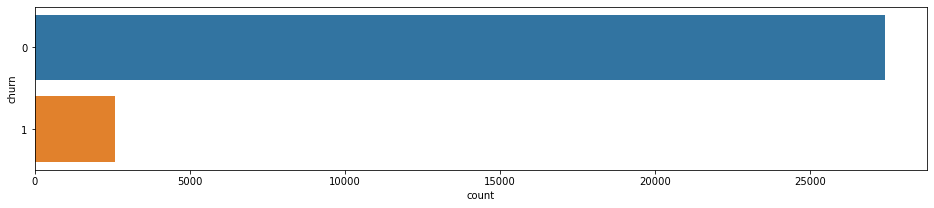

0    91.359835
1     8.640165
Name: churn, dtype: float64

In [36]:
# check for amount of defaulters in the data using countplot
plt.figure(figsize=(16,3))
sns.countplot(y="churn", data=telecom)
plt.show()
telecom["churn"].value_counts()/telecom.shape[0]*100

In [37]:
def plot_avgMonthlyCalls(data,calltype,colList):
    # create a color palette
    palette = plt.get_cmap('Set1')
    
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(data[colList].mean())
    ax.set_xticklabels(['Jun','Jul','Aug'])

    # Add titles
    plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")
    plt.show()

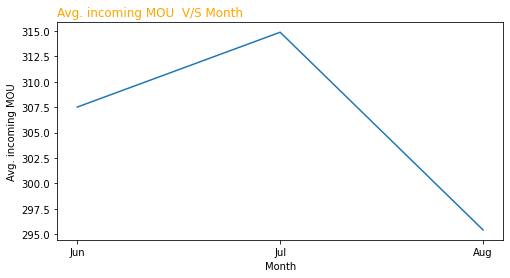

In [38]:
# Plotting Avg. total monthly incoming MOU vs AON
ic_col = telecom.filter(regex ='total_ic_mou').columns
plot_avgMonthlyCalls(telecom, calltype='incoming', colList=ic_col)

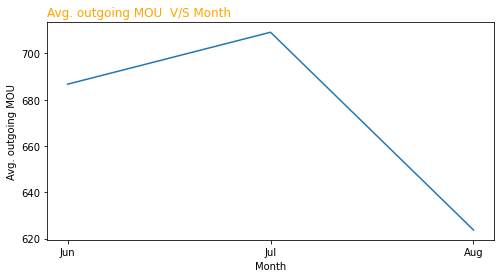

In [39]:
# Plotting Avg. total monthly outgoing MOU vs AON
og_col = telecom.filter(regex ='total_og_mou').columns
plot_avgMonthlyCalls(telecom, calltype='outgoing', colList=og_col)

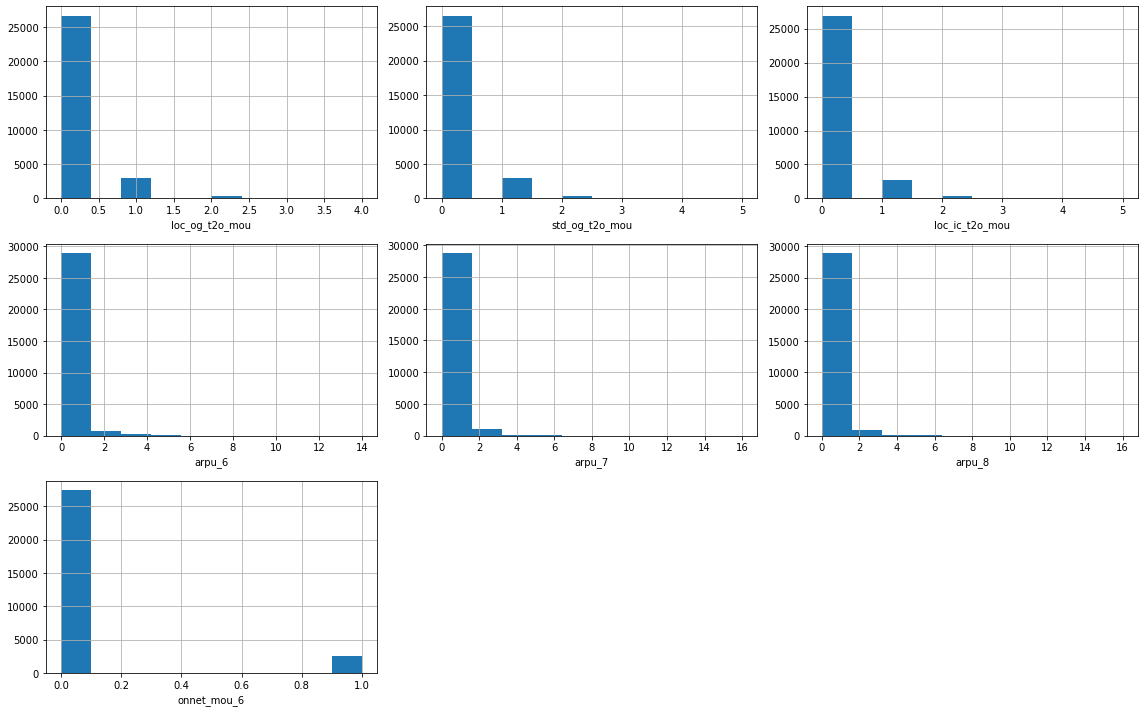

In [40]:
# distplots for categorical data

cat_features = ['monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8', 'churn']
fig = plt.figure(figsize=(16,10))
for i in range(len(cat_features)):
    fig.add_subplot(3, 3, i+1)
    telecom[cat_features].iloc[:,i].hist()
    plt.xlabel(telecom.columns[i])
plt.tight_layout()
plt.show()

#### Bivariate Analysis

In [41]:
def plot_byChurnMou(data,colList, calltype):
    fig, ax = plt.subplots(figsize=(7,4))
    df=data.groupby(['churn'])[colList].mean().T
    plt.plot(df)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")

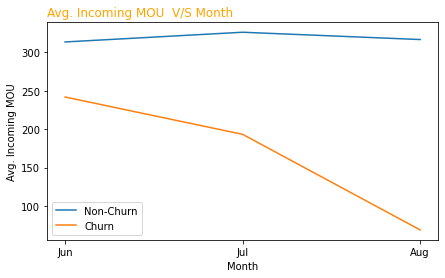

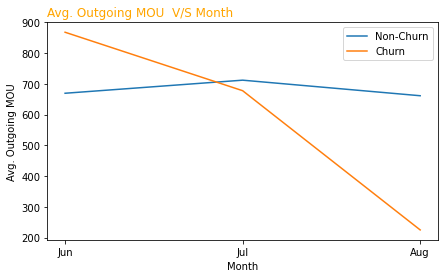

In [42]:
# graph for incoming and outgoing in month 6,7,8 by churn
ic_col = ['total_ic_mou_6','total_ic_mou_7', 'total_ic_mou_8']
og_col = ['total_og_mou_6','total_og_mou_7', 'total_og_mou_8']
plot_byChurnMou(telecom, ic_col, 'Incoming')
plot_byChurnMou(telecom, og_col, 'Outgoing')

In [43]:
def plot_byChurn(data, col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList = list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(data.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()
    # Numeric stats for per month churn vs Non-Churn
    return data.groupby('churn')[colList].mean()

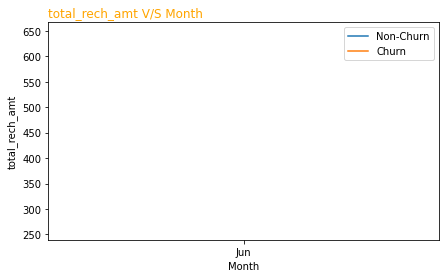

,total_rech_amt_8
churn,
0,647.192501
1,258.846895


In [44]:
# graph for total recharge amount in month 6,7,8 by churn
plot_byChurn(telecom,'total_rech_amt')

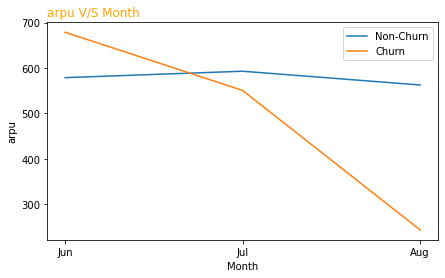

,arpu_6,arpu_7,arpu_8
churn,,,
0,578.63736,592.788162,562.453248
1,678.71697,550.511946,243.063343


In [45]:
# graph for arpu in month 6,7,8 by churn
plot_byChurn(telecom,'arpu')

#### Multivariate Analysis

In [46]:
def plotCorrelation(cols, df, figsize=(20,10)):
    plt.figure(figsize=figsize)
    sns.heatmap(df[cols].corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, center = 0)
    plt.show()

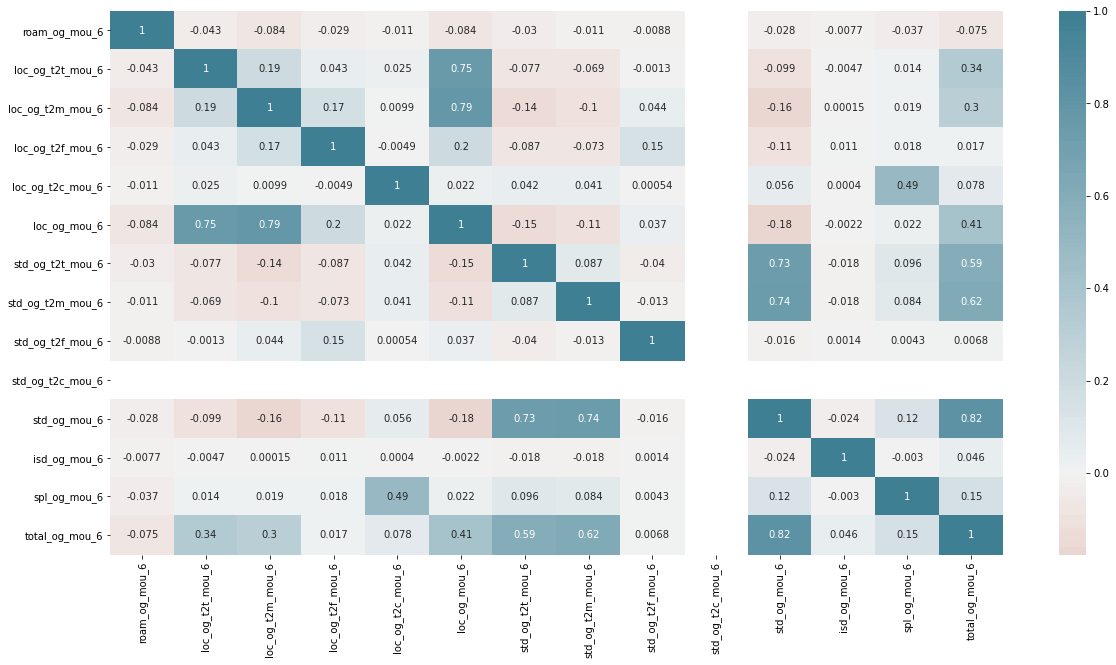

In [47]:
# correlation within outgoing minutes of usage for month 6
og_mou_6 = telecom.columns[telecom.columns.str.contains('.*_og_.*mou_6',regex=True)]
plotCorrelation(og_mou_6, telecom)

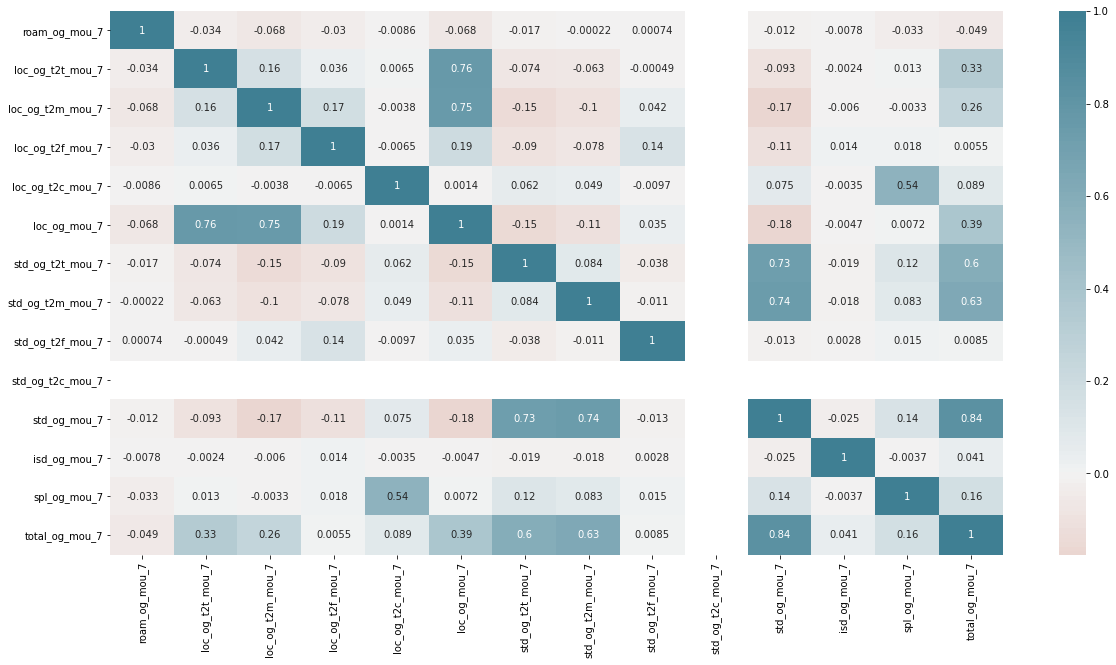

In [48]:
# correlation within outgoing minutes of usage for month 7
og_mou_7 = telecom.columns[telecom.columns.str.contains('.*_og_.*mou_7',regex=True)]
plotCorrelation(og_mou_7, telecom)

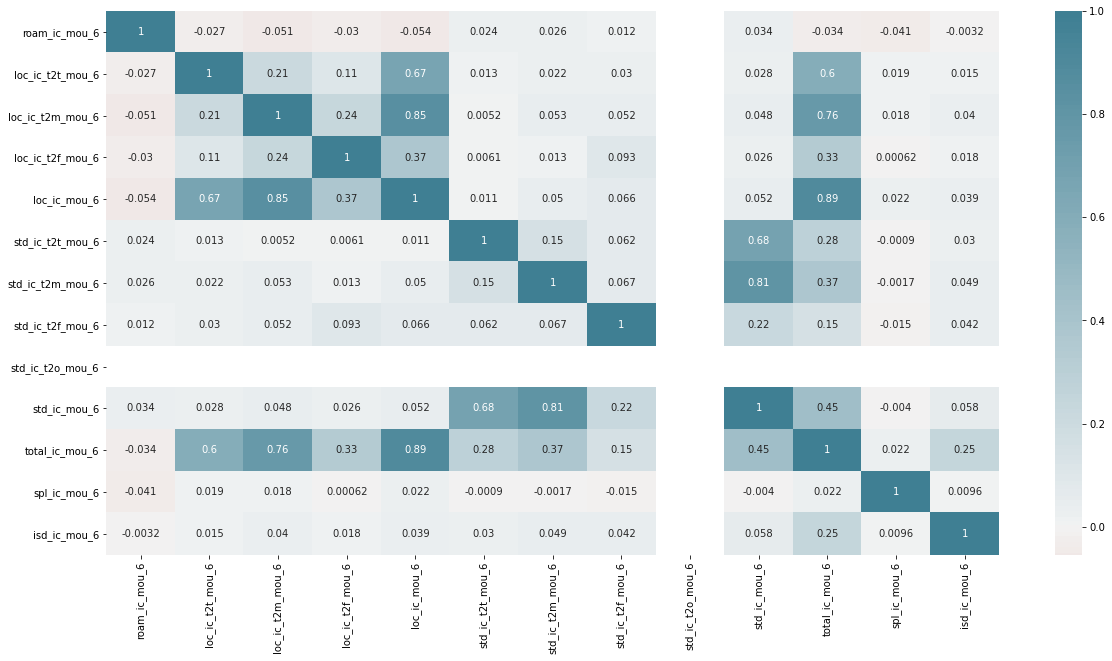

In [49]:
# correlation within incoming minutes of usage for month 6
ic_mou_6 = telecom.columns[telecom.columns.str.contains('.*_ic_.*mou_6',regex=True)]
plotCorrelation(ic_mou_6, telecom)

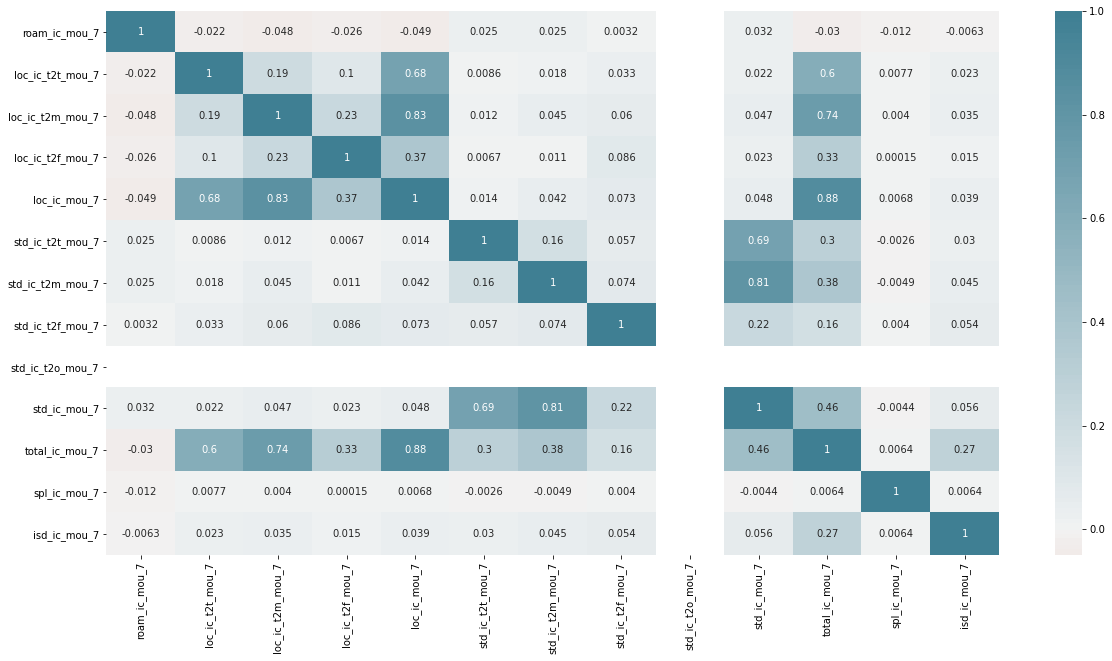

In [50]:
# correlation within incoming minutes of usage for month 7
ic_mou_7 = telecom.columns[telecom.columns.str.contains('.*_ic_.*mou_7',regex=True)]
plotCorrelation(ic_mou_7, telecom)

# Step 4. Data Preparation

In [51]:
# in multivariate analysis, we can see some of the variables have no correlation with any of the data , lets check what records they holds.
# check for the columns having only one single values (i.e. 0 only)
singleValueColumns= []
for i in telecom.columns.to_list():
    if len(telecom[i].unique())==1:
        singleValueColumns.append(i)
singleValueColumns

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [52]:
# it seems they holds all values as 0, but lets check their statiscal values
telecom[singleValueColumns].describe().T

,count,mean,std,min,25%,50%,75%,max
loc_og_t2o_mou,30011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_og_t2o_mou,30011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
loc_ic_t2o_mou,30011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_og_t2c_mou_6,30011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_og_t2c_mou_7,30011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_og_t2c_mou_8,30011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_ic_t2o_mou_6,30011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_ic_t2o_mou_7,30011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_ic_t2o_mou_8,30011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#lets drop them
telecom.drop(singleValueColumns,axis=1,inplace=True)

In [54]:
telecom.shape

(30011, 124)

#### Derive New Features

In [55]:
# we can merge all similar columns related to month 6 and month 7 as they all belongs to Good Phase and derive new features as average
newFeature=[]
mergeCols=telecom.filter(regex='_6|_7').columns.str[:-2]
for i in mergeCols.unique():
    newFeature='avg_'+i+'_6&7'
    telecom[newFeature]=(telecom[i+"_6"]+telecom[i+"_7"])/2
telecom.shape

(30011, 163)

New Columns have been added.

#### Train-Test Split Data

We can see the class is highly imbalance.
Lets balance the date

In [56]:
y=telecom.pop('churn')
X=telecom.copy()

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)

In [58]:
print("X_train :", X_train.shape , "y_train :" , y_train.shape)
print("X_test  :", X_test.shape ,  "y_test :" , y_test.shape)

X_train : (21007, 162) y_train : (21007,)
X_test  : (9004, 162) y_test : (9004,)


#### Handle Class Imbalance

In [59]:
y.value_counts(normalize=True)

0    0.913598
1    0.086402
Name: churn, dtype: float64

As we can see, how the churn rate is ditributed is highly imbalance, lets add some synthetic data in training set in order to make it balance

In [60]:
smote=SMOTE()
X_train,y_train=smote.fit_resample(X_train,y_train)

In [61]:
y_train.value_counts(normalize=True)

1    0.5
0    0.5
Name: churn, dtype: float64

Now the date is balance.

In [62]:
# our new train-test will be
print("X_train :", X_train.shape , "y_train :" , y_train.shape)
print("X_test  :", X_test.shape ,  "y_test  :" , y_test.shape)

X_train : (38374, 162) y_train : (38374,)
X_test  : (9004, 162) y_test  : (9004,)


#### Feature Scaling

In [63]:
scaler = StandardScaler()
cols = X_train.columns
X_train[cols]=scaler.fit_transform(X_train[cols])
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_amt_m6m7,avg_arpu_6&7,avg_onnet_mou_6&7,avg_offnet_mou_6&7,avg_roam_ic_mou_6&7,avg_roam_og_mou_6&7,avg_loc_og_t2t_mou_6&7,avg_loc_og_t2m_mou_6&7,avg_loc_og_t2f_mou_6&7,avg_loc_og_t2c_mou_6&7,avg_loc_og_mou_6&7,avg_std_og_t2t_mou_6&7,avg_std_og_t2m_mou_6&7,avg_std_og_t2f_mou_6&7,avg_std_og_mou_6&7,avg_isd_og_mou_6&7,avg_spl_og_mou_6&7,avg_og_others_6&7,avg_total_og_mou_6&7,avg_loc_ic_t2t_mou_6&7,avg_loc_ic_t2m_mou_6&7,avg_loc_ic_t2f_mou_6&7,avg_loc_ic_mou_6&7,avg_std_ic_t2t_mou_6&7,avg_std_ic_t2m_mou_6&7,avg_std_ic_t2f_mou_6&7,avg_std_ic_mou_6&7,avg_total_ic_mou_6&7,avg_spl_ic_mou_6&7,avg_isd_ic_mou_6&7,avg_ic_others_6&7,avg_total_rech_num_6&7,avg_max_rech_amt_6&7,avg_last_day_rch_amt_6&7,avg_vol_2g_mb_6&7,avg_vol_3g_mb_6&7,avg_monthly_2g_6&7,avg_sachet_2g_6&7,avg_monthly_3g_6&7,avg_sachet_3g_6&7
0,-0.233675,-0.423750,-0.285421,-0.568521,-0.522866,-0.407570,-0.261752,-0.424382,-0.514829,-0.231584,-0.206207,-0.216304,-0.276073,-0.294169,-0.288191,-0.121553,-0.094668,-0.108615,0.589781,0.150544,-0.342458,1.392871,0.699527,1.052865,-0.2485,-0.228343,-0.214792,0.381765,0.080969,-0.243858,-0.522442,-0.486675,-0.358629,-0.546212,-0.495381,-0.384121,0.059956,0.311388,0.378796,-0.740790,-0.677208,-0.488770,-0.074324,-0.058318,-0.042380,-0.358106,-0.351216,-0.266907,-0.347201,-0.019638,-0.016714,-0.537198,-0.618177,-0.530350,-0.284955,-0.099851,-0.263371,0.735995,0.320357,-0.107848,-0.139665,-0.256078,0.034261,0.370153,0.129986,-0.209382,-0.241825,-0.230157,-0.188573,-0.347609,-0.294403,-0.263425,0.208383,-0.043211,0.069934,-0.355440,-0.344558,-0.284063,0.165483,-0.048579,-0.224031,-0.369336,-0.099829,-0.154980,-0.193720,-0.163675,0.033053,-0.085120,-0.085823,-0.076157,-0.716025,-0.710088,-0.449710,-0.222061,0.218403,0.218889,0.475565,0.079237,0.299352,0.522227,3.335869,2.715188,-0.203759,-0.279720,0.488868,1.747975,3.189940,3.044067,3.462952,-0.273537,-0.275853,-0.260296,-0.261580,-0.247677,-0.225578,-0.132407,-0.123804,-0.114183,0.394047,0.043611,-0.120440,-0.289537,-0.475727,-0.391234,-0.594968,-0.376443,-0.242966,-0.318677,-0.118813,0.403628,1.105912,-0.286929,0.255907,-0.545283,-0.566155,0.211841,-0.777866,-0.071609,-0.409488,-0.222578,-0.648602,-0.206988,0.568707,-0.214557,0.267813,-0.257548,-0.348622,0.084591,-0.

In [64]:
X_test[cols]=scaler.transform(X_test[cols])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_amt_m6m7,avg_arpu_6&7,avg_onnet_mou_6&7,avg_offnet_mou_6&7,avg_roam_ic_mou_6&7,avg_roam_og_mou_6&7,avg_loc_og_t2t_mou_6&7,avg_loc_og_t2m_mou_6&7,avg_loc_og_t2f_mou_6&7,avg_loc_og_t2c_mou_6&7,avg_loc_og_mou_6&7,avg_std_og_t2t_mou_6&7,avg_std_og_t2m_mou_6&7,avg_std_og_t2f_mou_6&7,avg_std_og_mou_6&7,avg_isd_og_mou_6&7,avg_spl_og_mou_6&7,avg_og_others_6&7,avg_total_og_mou_6&7,avg_loc_ic_t2t_mou_6&7,avg_loc_ic_t2m_mou_6&7,avg_loc_ic_t2f_mou_6&7,avg_loc_ic_mou_6&7,avg_std_ic_t2t_mou_6&7,avg_std_ic_t2m_mou_6&7,avg_std_ic_t2f_mou_6&7,avg_std_ic_mou_6&7,avg_total_ic_mou_6&7,avg_spl_ic_mou_6&7,avg_isd_ic_mou_6&7,avg_ic_others_6&7,avg_total_rech_num_6&7,avg_max_rech_amt_6&7,avg_last_day_rch_amt_6&7,avg_vol_2g_mb_6&7,avg_vol_3g_mb_6&7,avg_monthly_2g_6&7,avg_sachet_2g_6&7,avg_monthly_3g_6&7,avg_sachet_3g_6&7
39713,-0.636146,-0.038963,1.437380,-0.345398,-0.085180,0.040562,-0.614571,-0.585228,-0.259710,0.217042,-0.206207,-0.216304,-0.158440,-0.294169,-0.288191,-0.289367,-0.156724,-0.220361,-0.473942,-0.431450,-0.132308,-0.195536,-0.069162,-0.269193,0.367255,0.217966,1.041612,-0.506010,-0.389298,-0.234502,-0.202319,0.006790,0.186380,-0.409913,-0.382449,-0.143212,-0.115465,0.123473,-0.122032,-0.428951,-0.266183,0.027705,-0.074324,-0.058318,-0.042380,0.122744,1.151950,1.466439,1.303303,-0.019638,-0.016714,-0.647979,-0.391637,-0.026304,0.188582,0.350476,-0.018001,-0.044619,0.102037,0.115476,-0.269936,-0.081883,-0.261917,0.021514,0.236635,0.025742,-0.179725,-0.085268,0.435804,-0.204267,-0.191928,-0.263425,-0.098175,0.102648,-0.100243,-0.259576,-0.174737,0.004083,-0.101380,0.107658,0.040386,0.069589,-0.099829,-0.154980,-0.19372,-0.163675,-0.140604,-0.051189,-0.085823,-0.076157,0.545876,2.088350,4.274433,1.354015,-0.678145,-0.284522,-0.460053,-0.708253,-0.508037,-0.330460,0.087904,-0.028502,0.091940,0.226539,2.786201,3.107343,-0.248951,-0.255084,-0.232057,0.410377,0.987420,6.072291,-0.26158,-0.247677,-0.225578,1.053908,-0.123804,-0.114183,-0.557281,1.621968,2.675577,-0.289537,-0.395131,-0.423941,-0.237297,-0.659193,0.002693,-0.246495,-0.248035,-0.484898,-0.140557,0.343072,-0.483672,-0.107056,-0.430657,0.009703,-0.381976,-0.071609,0.790221,0.763348,-0.584780,0.295809,0.027830,-0.182873,0.134907,-0.146072,-0.215815,0.006068,-0.234651

# Step 5. Model Building and Evaluation

### 5.1 High Perfomance Model Using PCA

##### Finding pricipal components

In [65]:
pca = PCA(random_state=seed)
pca.fit(X_train)

PCA(random_state=12)

In [66]:
pca.components_

array([[ 5.39793769e-02,  8.24015274e-02,  1.09543396e-01, ...,
         1.66478357e-03,  5.08177957e-02,  3.40155449e-03],
       [ 9.67505594e-02,  1.30933282e-01,  9.15595332e-02, ...,
        -6.52602836e-03, -5.47776121e-02, -1.33141899e-02],
       [ 1.08677686e-01,  1.49719916e-01,  1.59740351e-01, ...,
        -2.05636964e-02,  1.89284272e-01,  4.04712933e-02],
       ...,
       [-0.00000000e+00,  5.94142791e-17, -1.18093469e-16, ...,
         1.29236899e-16, -2.70616862e-16, -1.04083409e-16],
       [-0.00000000e+00, -4.02455846e-16, -1.77945148e-16, ...,
        -3.68628739e-16,  9.02056208e-17, -2.70616862e-16],
       [ 0.00000000e+00, -1.97758476e-16,  9.87750282e-17, ...,
         3.26128013e-16,  6.93889390e-17, -3.60822483e-16]])

In [67]:
pca.explained_variance_ratio_

array([1.03912421e-01, 8.56421699e-02, 5.61726607e-02, 4.69970591e-02,
       4.04594022e-02, 3.86663291e-02, 3.15203201e-02, 3.04453983e-02,
       2.91297101e-02, 2.70721450e-02, 2.64768493e-02, 2.45954582e-02,
       2.33628959e-02, 2.22440343e-02, 2.14610923e-02, 2.00385768e-02,
       1.80131618e-02, 1.70189296e-02, 1.61419518e-02, 1.57428494e-02,
       1.46135755e-02, 1.42787648e-02, 1.24297086e-02, 1.09951492e-02,
       1.03082154e-02, 1.01924181e-02, 9.78206243e-03, 8.76362411e-03,
       8.72080535e-03, 8.58473919e-03, 7.53685489e-03, 7.25407443e-03,
       7.10447121e-03, 6.72470954e-03, 6.45109594e-03, 6.33369033e-03,
       6.12564941e-03, 6.00731046e-03, 5.51590429e-03, 5.50611693e-03,
       5.14910799e-03, 5.07781921e-03, 4.75682166e-03, 4.54991127e-03,
       4.39329109e-03, 4.13601079e-03, 4.04065406e-03, 3.81083444e-03,
       3.76190539e-03, 3.74632709e-03, 3.55751991e-03, 3.42313369e-03,
       3.34671022e-03, 3.18810587e-03, 3.14583607e-03, 3.09361280e-03,
      

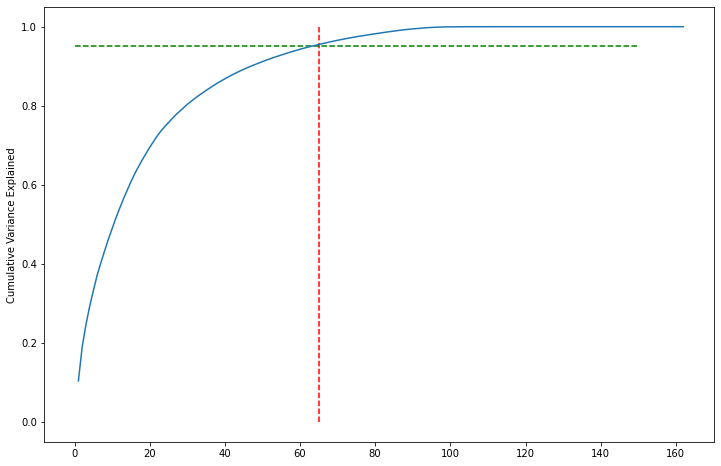

In [68]:
var_cum=np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=[12,8])
plt.vlines(x=65, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=150, xmin=0, colors="g", linestyles="--")
plt.plot(range(1,len(var_cum)+1),var_cum)
plt.ylabel("Cumulative Variance Explained")
plt.show()

There is 65 components which can describe 95% of variance in the data.

In [69]:
# we require almost 95% of variance in the data
pca_final=PCA(0.95)
pca_X_train=pca_final.fit_transform(X_train)
pca_X_train.shape

(38374, 63)

The train dataframe has 63 columns

In [70]:
pca_final = IncrementalPCA(n_components=65)
pca_X_train = pca_final.fit_transform(X_train)

In [71]:
pca_X_test=pca_final.transform(X_test)
pca_X_test.shape

(9004, 65)

The test dataframe has 63 colums.

### Data Modelling

#### 1. Random Forest

In [72]:
rf=RandomForestClassifier(class_weight='balanced',random_state=seed,n_jobs=-1)
rf.fit(pca_X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=12)

In [73]:
def plotAUC(y_true, y_pred_proba):
    fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred_proba[:,1])
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(6,6))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def display_scores(y_true, y_pred, y_pred_proba, plot=False):
    cfm = metrics.confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cfm.ravel()
    print(f"Accuracy Score: {round(metrics.accuracy_score(y_true, y_pred)*100,4)}%")
    print(f"Sensitivity/Recall/TPR: {round(tp/(tp+fn)*100,4)}%")
    print(f"FPR: {round(fp/(tn+fp)*100,4)}%")
    print(f"Specificity: {round(tn/(tn+fp)*100,4)}%")
    print(f"Precision: {round(tp/(tp+fp)*100,4)}%")
    print(f"F1 Score: {round(metrics.f1_score(y_true, y_pred)*100,4)}%")
    print(f"Prediction AUC Score: {round(metrics.roc_auc_score(y_true, y_pred)*100,4)}%")
    print(f"Mean Square Error: {round(metrics.mean_squared_error(y_true, y_pred),10)}")
    if plot:
        plotAUC(y_true, y_pred_proba)

# function for prediction metrics
def displayPredictionMetrics(model, X_train, y_train, showROC=False):
    y_pred_proba = model.predict_proba(X_train)
    y_pred = model.predict(X_train)
    display_scores(y_train, y_pred, y_pred_proba, showROC)
    

In [74]:
# find train prediction metrics
displayPredictionMetrics(rf, pca_X_train, y_train)

Accuracy Score: 100.0%
Sensitivity/Recall/TPR: 100.0%
FPR: 0.0%
Specificity: 100.0%
Precision: 100.0%
F1 Score: 100.0%
Prediction AUC Score: 100.0%
Mean Square Error: 0.0


Accuracy Score: 90.4487%
Sensitivity/Recall/TPR: 55.2393%
FPR: 6.2447%
Specificity: 93.7553%
Precision: 45.3773%
F1 Score: 49.825%
Prediction AUC Score: 74.4973%
Mean Square Error: 0.0955131053


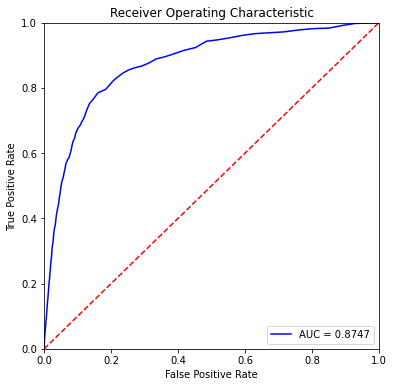

In [75]:
# find test prediction metrics
displayPredictionMetrics(rf, pca_X_test, y_test, True)

##### HyperParameter Tuning

In [76]:
params={
    'max_depth':[2,5,10],
    'min_samples_leaf':[50,75],
    'max_features':[40,50,60],
    'min_samples_split':[80,100],
    'n_estimators':[50,100]
}

# cross validation
grid_search=GridSearchCV(estimator=rf,param_grid=params,cv=4,n_jobs=-1,verbose=1,return_train_score=True)
grid_search.fit(pca_X_train,y_train)

Fitting 4 folds for each of 72 candidates, totalling 288 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=12),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10], 'max_features': [40, 50, 60],
                         'min_samples_leaf': [50, 75],
                         'min_samples_split': [80, 100],
                         'n_estimators': [50, 100]},
             return_train_score=True, verbose=1)

In [77]:
# display all final tuned hyper parameters for rfc
print('We can get the sensitivity of',grid_search.best_score_,'using',grid_search.best_params_)

We can get the sensitivity of 0.8632409610005698 using {'max_depth': 10, 'max_features': 50, 'min_samples_leaf': 50, 'min_samples_split': 80, 'n_estimators': 50}


#### 2. Gradient Boosting 

In [78]:
# fit model
xg = xgb.XGBClassifier(scale_pos_weight=(y_train.value_counts()[0]/y_train.value_counts()[1]), n_jobs=-1)
xg.fit(pca_X_train,y_train)

[19:47:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1.0, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
# find train prediction metrics
displayPredictionMetrics(xg, pca_X_train, y_train)

Accuracy Score: 99.1609%
Sensitivity/Recall/TPR: 99.8176%
FPR: 1.4958%
Specificity: 98.5042%
Precision: 98.5236%
F1 Score: 99.1664%
Prediction AUC Score: 99.1609%
Mean Square Error: 0.0083910981


Accuracy Score: 89.6157%
Sensitivity/Recall/TPR: 61.9664%
FPR: 7.7876%
Specificity: 92.2124%
Precision: 42.7679%
F1 Score: 50.6075%
Prediction AUC Score: 77.0894%
Mean Square Error: 0.1038427366


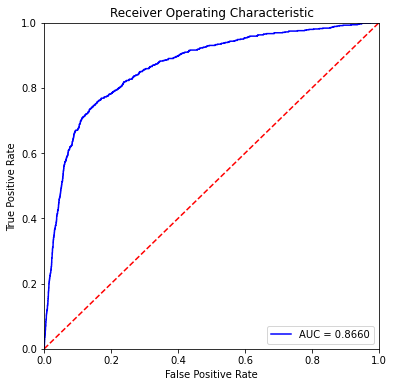

In [80]:
# find test prediction metrics
displayPredictionMetrics(xg, pca_X_test, y_test, True)

##### HyperParameter Tuning

In [81]:
# tuning all final hyperparameters for xgb
parameters = {'learning_rate': [0.1,0.2,0.3], 
              'subsample': [0.3,0.4,0.5]
             }
# cross validation
grid_search_xg = GridSearchCV(estimator = xg, n_jobs=-1, param_grid = parameters, 
                             scoring= 'recall', cv = 3, return_train_score=True, verbose = 3)
grid_search_xg.fit(pca_X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[19:50:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1.0, subsample=1,
                                     tree_method='exact', validate_parameters=1,
      

In [82]:
# display all final tuned hyper parameters for xgb
print('We can get the sensitivity of',grid_search_xg.best_score_,'using',grid_search_xg.best_params_)

We can get the sensitivity of 0.9607550197111401 using {'learning_rate': 0.3, 'subsample': 0.5}


### Model Evaluation

#### 1. Random Forest

In [83]:
print("Evaluating RFC Model with best parameters on Train Dataset",grid_search.best_params_,"\n")
displayPredictionMetrics(grid_search, pca_X_train, y_train)

Evaluating RFC Model with best parameters on Train Dataset {'max_depth': 10, 'max_features': 50, 'min_samples_leaf': 50, 'min_samples_split': 80, 'n_estimators': 50} 

Accuracy Score: 89.1307%
Sensitivity/Recall/TPR: 89.1385%
FPR: 10.8772%
Specificity: 89.1228%
Precision: 89.1245%
F1 Score: 89.1315%
Prediction AUC Score: 89.1307%
Mean Square Error: 0.1086933861


Evaluating RFC Model with best parameters on Test Dataset {'max_depth': 10, 'max_features': 50, 'min_samples_leaf': 50, 'min_samples_split': 80, 'n_estimators': 50} 

Accuracy Score: 86.0173%
Sensitivity/Recall/TPR: 71.6688%
FPR: 12.6352%
Specificity: 87.3648%
Precision: 34.7553%
F1 Score: 46.8103%
Prediction AUC Score: 79.5168%
Mean Square Error: 0.1398267437


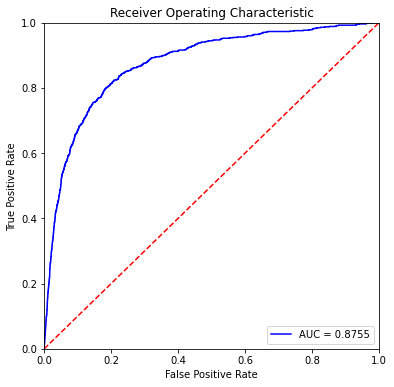

In [84]:
print("Evaluating RFC Model with best parameters on Test Dataset",grid_search.best_params_,"\n")
displayPredictionMetrics(grid_search, pca_X_test, y_test, True)

#### 2. XGBoost

In [85]:
print("Evaluating XGB Model with best parameters on Train Dataset",grid_search_xg.best_params_,"\n")
displayPredictionMetrics(grid_search_xg, pca_X_train, y_train)

Evaluating XGB Model with best parameters on Train Dataset {'learning_rate': 0.3, 'subsample': 0.5} 

Accuracy Score: 99.2%
Sensitivity/Recall/TPR: 99.7498%
FPR: 1.3499%
Specificity: 98.6501%
Precision: 98.6648%
F1 Score: 99.2044%
Prediction AUC Score: 99.2%
Mean Square Error: 0.0080002085


Evaluating XGB Model with best parameters on Test Dataset {'learning_rate': 0.3, 'subsample': 0.5} 

Accuracy Score: 89.7046%
Sensitivity/Recall/TPR: 61.0608%
FPR: 7.6054%
Specificity: 92.3946%
Precision: 42.9872%
F1 Score: 50.4543%
Prediction AUC Score: 76.7277%
Mean Square Error: 0.1029542426


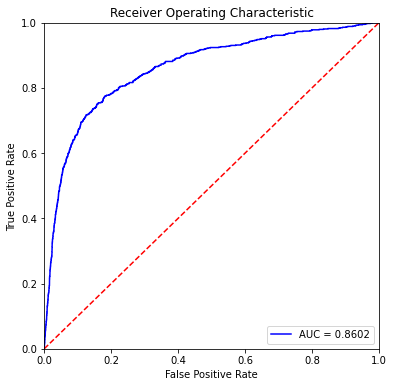

In [86]:
print("Evaluating XGB Model with best parameters on Test Dataset",grid_search_xg.best_params_,"\n")
displayPredictionMetrics(grid_search_xg, pca_X_test, y_test, True)

### 5.2 Feature Importance Model without PCA

#### Logistic Regression Model with all features

In [87]:
# find stats for model using all features
lr = LogisticRegression(random_state=seed, class_weight='balanced', n_jobs=-1)
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=12)

In [88]:
displayPredictionMetrics(lr, X_train, y_train)

Accuracy Score: 94.1419%
Sensitivity/Recall/TPR: 92.964%
FPR: 4.6803%
Specificity: 95.3197%
Precision: 95.2068%
F1 Score: 94.072%
Prediction AUC Score: 94.1419%
Mean Square Error: 0.0585813311


#### Random Feature Selection

In [89]:
lr = LogisticRegression(random_state=seed, class_weight='balanced', n_jobs=-1, max_iter=500, verbose=1)
rfe=RFE(estimator=lr,n_features_to_select=30)
rf=rfe.fit(X_train,y_train)
rf.support_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   53.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   33.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   38.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   29.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   36.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   32.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   39.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   12.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   13.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1

array([False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True,  True, False, False,  True,  True, False,  True,  True,
       False, False, False, False, False, False, False,  True,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [90]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('arpu_6', False, 111),
 ('arpu_7', False, 112),
 ('arpu_8', False, 35),
 ('onnet_mou_6', False, 40),
 ('onnet_mou_7', False, 119),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 81),
 ('offnet_mou_7', False, 26),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 126),
 ('roam_ic_mou_7', False, 93),
 ('roam_ic_mou_8', False, 124),
 ('roam_og_mou_6', False, 122),
 ('roam_og_mou_7', False, 22),
 ('roam_og_mou_8', False, 21),
 ('loc_og_t2t_mou_6', False, 76),
 ('loc_og_t2t_mou_7', False, 84),
 ('loc_og_t2t_mou_8', False, 12),
 ('loc_og_t2m_mou_6', False, 25),
 ('loc_og_t2m_mou_7', False, 28),
 ('loc_og_t2m_mou_8', False, 13),
 ('loc_og_t2f_mou_6', False, 104),
 ('loc_og_t2f_mou_7', False, 77),
 ('loc_og_t2f_mou_8', False, 45),
 ('loc_og_t2c_mou_6', False, 133),
 ('loc_og_t2c_mou_7', False, 110),
 ('loc_og_t2c_mou_8', False, 106),
 ('loc_og_mou_6', False, 34),
 ('loc_og_mou_7', False, 78),
 ('loc_og_mou_8', False, 11),
 ('std_og_t2t_mou_6', False, 30),
 ('std_og_t2t_mou_7', False

In [91]:
col=X_train.columns[rfe.support_]
col

Index(['onnet_mou_8', 'offnet_mou_8', 'std_og_mou_7', 'total_og_mou_8',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8',
       'isd_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7',
       'max_rech_amt_6', 'max_rech_amt_7', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'monthly_2g_6', 'monthly_2g_7', 'sachet_2g_6',
       'sachet_2g_7', 'monthly_3g_6', 'monthly_3g_7', 'sachet_3g_6',
       'sachet_3g_7', 'avg_total_rech_num_6&7', 'avg_max_rech_amt_6&7',
       'avg_last_day_rch_amt_6&7', 'avg_monthly_2g_6&7', 'avg_sachet_2g_6&7',
       'avg_monthly_3g_6&7', 'avg_sachet_3g_6&7'],
      dtype='object')

In [92]:
X_train_rfe=X_train[col]
X_test_rfe=X_test[col]

In [93]:
X_train_rfe.shape
X_test_rfe.shape

(9004, 30)

#### Manual Feature Selection

In [129]:
def LogModel(X_train_rfe):
    X_train_sm=sm.add_constant(X_train_rfe)
    X_test_sm=sm.add_constant(X_test_rfe)
    log=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
    res=log.fit()
    print(res.summary())
LogModel(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38343
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 03 Nov 2021   Deviance:                          nan
Time:                        22:40:00   Pearson chi2:                 7.38e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### Variance Inflation Factor

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
def vifCalculator(X_train,vif):
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif
vifCalculator(X_train_rfe,vif)


,Features,VIF
24,avg_max_rech_amt_6&7,700427.82
25,avg_last_day_rch_amt_6&7,391471.23
12,max_rech_amt_7,261944.77
11,max_rech_amt_6,233589.80
13,last_day_rch_amt_6,155734.99
14,last_day_rch_amt_7,153978.86
23,avg_total_rech_num_6&7,2008.89
9,total_rech_num_6,663.86
10,total_rech_num_7,629.86
27,avg_sachet_2g_6&7,122.60


In [131]:
# drop column avg_max_rech_amt_6&7 due to high VIF

In [132]:
X_train_rfe.drop(columns ='avg_max_rech_amt_6&7',axis = 1,inplace = True)

LogModel(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38344
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 03 Nov 2021   Deviance:                          nan
Time:                        22:40:14   Pearson chi2:                 4.63e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [135]:
# calculate VIF 
vif = pd.DataFrame()
vifCalculator(X_train_rfe,vif)

,Features,VIF
24,avg_last_day_rch_amt_6&7,319942.11
13,last_day_rch_amt_6,127277.84
14,last_day_rch_amt_7,125845.60
23,avg_total_rech_num_6&7,1859.17
9,total_rech_num_6,615.18
10,total_rech_num_7,582.84
26,avg_sachet_2g_6&7,122.22
28,avg_sachet_3g_6&7,118.01
7,total_ic_mou_8,103.66
5,loc_ic_mou_8,73.36


In [136]:
# drop column avg_last_day_rch_amt_6&7 due to high VIF
X_train_rfe.drop(columns ='avg_last_day_rch_amt_6&7',axis = 1,inplace = True)

LogModel(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38345
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 03 Nov 2021   Deviance:                          nan
Time:                        22:42:26   Pearson chi2:                 8.26e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.34

In [137]:
# calculate VIF 
vif = pd.DataFrame()
vifCalculator(X_train_rfe,vif)

,Features,VIF
23,avg_total_rech_num_6&7,1347.97
9,total_rech_num_6,446.67
10,total_rech_num_7,423.56
25,avg_sachet_2g_6&7,120.77
27,avg_sachet_3g_6&7,117.87
7,total_ic_mou_8,103.64
5,loc_ic_mou_8,73.36
22,sachet_3g_7,40.96
18,sachet_2g_7,39.67
17,sachet_2g_6,35.10


In [138]:
# drop column avg_total_rech_num_6&7 due to high VIF
X_train_rfe.drop(columns ='avg_total_rech_num_6&7',axis = 1,inplace = True)

LogModel(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38346
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 03 Nov 2021   Deviance:                          nan
Time:                        22:43:23   Pearson chi2:                 4.13e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5125.5932   1.28

In [139]:
# calculate VIF 
vif = pd.DataFrame()
vifCalculator(X_train_rfe,vif)

,Features,VIF
26,avg_sachet_3g_6&7,117.25
24,avg_sachet_2g_6&7,114.02
7,total_ic_mou_8,101.00
5,loc_ic_mou_8,71.95
22,sachet_3g_7,40.76
18,sachet_2g_7,37.42
3,total_og_mou_8,34.32
17,sachet_2g_6,33.19
21,sachet_3g_6,29.84
25,avg_monthly_3g_6&7,27.07


In [140]:
#drop avg_sachet_3g_6&7 due to high p value and VIF
X_train_rfe.drop(columns ='avg_sachet_3g_6&7',axis = 1,inplace = True)

LogModel(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38347
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 03 Nov 2021   Deviance:                          nan
Time:                        22:44:54   Pearson chi2:                 4.07e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4964.0562   1.27

In [141]:
# calculate VIF 
vif = pd.DataFrame()
vifCalculator(X_train_rfe,vif)

,Features,VIF
24,avg_sachet_2g_6&7,104.31
7,total_ic_mou_8,100.86
5,loc_ic_mou_8,71.86
18,sachet_2g_7,34.39
3,total_og_mou_8,34.32
17,sachet_2g_6,30.72
25,avg_monthly_3g_6&7,26.29
1,offnet_mou_8,15.31
0,onnet_mou_8,15.00
6,std_ic_mou_8,13.83


In [142]:
# drop avg_sachet_2g_6&7 due to high p value and VIF
X_train_rfe.drop(columns ='avg_sachet_2g_6&7',axis = 1,inplace = True)

LogModel(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38348
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 03 Nov 2021   Deviance:                          nan
Time:                        22:46:06   Pearson chi2:                 2.85e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1562.8115   8.87

In [143]:
# calculate VIF 
vif = pd.DataFrame()
vifCalculator(X_train_rfe,vif)

,Features,VIF
7,total_ic_mou_8,100.57
5,loc_ic_mou_8,71.75
3,total_og_mou_8,34.26
24,avg_monthly_3g_6&7,26.19
1,offnet_mou_8,15.31
0,onnet_mou_8,14.99
6,std_ic_mou_8,13.80
23,avg_monthly_2g_6&7,11.50
20,monthly_3g_7,9.46
19,monthly_3g_6,9.21


In [145]:
# drop avg_monthly_3g_6&7  due to high p value
X_train_rfe.drop(columns ='avg_monthly_3g_6&7',axis = 1,inplace = True)

LogModel(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38349
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 03 Nov 2021   Deviance:                          nan
Time:                        22:47:13   Pearson chi2:                 2.09e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                968.6855   6.53

In [146]:
# calculate VIF 
vif = pd.DataFrame()
vifCalculator(X_train_rfe,vif)

,Features,VIF
7,total_ic_mou_8,99.44
5,loc_ic_mou_8,71.07
3,total_og_mou_8,34.23
1,offnet_mou_8,15.30
0,onnet_mou_8,14.99
6,std_ic_mou_8,13.66
23,avg_monthly_2g_6&7,11.21
16,monthly_2g_7,4.94
8,isd_ic_mou_8,4.64
15,monthly_2g_6,4.58


In [147]:
# drop avg_monthly_2g_6&7 due to high p vlaue
X_train_rfe.drop(columns ='avg_monthly_2g_6&7',axis = 1,inplace = True)

LogModel(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38350
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15102.
Date:                Wed, 03 Nov 2021   Deviance:                       30203.
Time:                        22:48:15   Pearson chi2:                 1.80e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0747      0

In [148]:
# calculate VIF 
vif = pd.DataFrame()
vifCalculator(X_train_rfe,vif)

,Features,VIF
7,total_ic_mou_8,99.22
5,loc_ic_mou_8,71.00
3,total_og_mou_8,34.22
1,offnet_mou_8,15.30
0,onnet_mou_8,14.99
6,std_ic_mou_8,13.63
8,isd_ic_mou_8,4.63
21,sachet_3g_6,2.67
22,sachet_3g_7,2.67
4,loc_ic_mou_7,2.55


In [149]:
# drop sachet_3g_7 due to high p value
X_train_rfe.drop(columns ='sachet_3g_7',axis = 1,inplace = True)

LogModel(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38351
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15102.
Date:                Wed, 03 Nov 2021   Deviance:                       30203.
Time:                        22:49:09   Pearson chi2:                 1.80e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0745      0

In [150]:
# calculate VIF 
vif = pd.DataFrame()
vifCalculator(X_train_rfe,vif)

,Features,VIF
7,total_ic_mou_8,99.03
5,loc_ic_mou_8,70.85
3,total_og_mou_8,34.22
1,offnet_mou_8,15.30
0,onnet_mou_8,14.99
6,std_ic_mou_8,13.60
8,isd_ic_mou_8,4.62
4,loc_ic_mou_7,2.55
11,max_rech_amt_6,2.09
18,sachet_2g_7,2.08


In [151]:
# drop max_rech_amt_6 due to high p value
X_train_rfe.drop(columns ='max_rech_amt_6',axis = 1,inplace = True)

LogModel(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38352
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15102.
Date:                Wed, 03 Nov 2021   Deviance:                       30204.
Time:                        22:50:06   Pearson chi2:                 1.81e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0746      0

In [152]:
# calculate VIF 
vif = pd.DataFrame()
vifCalculator(X_train_rfe,vif)

,Features,VIF
7,total_ic_mou_8,98.46
5,loc_ic_mou_8,70.42
3,total_og_mou_8,34.22
1,offnet_mou_8,15.29
0,onnet_mou_8,14.98
6,std_ic_mou_8,13.51
8,isd_ic_mou_8,4.60
4,loc_ic_mou_7,2.55
17,sachet_2g_7,2.08
16,sachet_2g_6,2.06


In [153]:
# drop sachet_2g_6  due to high p value
X_train_rfe.drop(columns ='sachet_2g_6',axis = 1,inplace = True)

LogModel(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38353
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15103.
Date:                Wed, 03 Nov 2021   Deviance:                       30205.
Time:                        22:51:01   Pearson chi2:                 1.81e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0753      0

In [154]:
# calculate VIF 
vif = pd.DataFrame()
vifCalculator(X_train_rfe,vif)

,Features,VIF
7,total_ic_mou_8,98.41
5,loc_ic_mou_8,70.39
3,total_og_mou_8,34.22
1,offnet_mou_8,15.29
0,onnet_mou_8,14.98
6,std_ic_mou_8,13.51
8,isd_ic_mou_8,4.60
4,loc_ic_mou_7,2.55
10,total_rech_num_7,1.97
2,std_og_mou_7,1.77


In [155]:
# drop total_ic_mou_8 due to high VIF
X_train_rfe.drop(columns ='total_ic_mou_8',axis = 1,inplace = True)

LogModel(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38354
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16647.
Date:                Wed, 03 Nov 2021   Deviance:                       33294.
Time:                        22:51:47   Pearson chi2:                 3.76e+08
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2614      0

In [156]:
# calculate VIF 
vif = pd.DataFrame()
vifCalculator(X_train_rfe,vif)

,Features,VIF
3,total_og_mou_8,32.40
1,offnet_mou_8,14.75
0,onnet_mou_8,14.45
5,loc_ic_mou_8,2.84
4,loc_ic_mou_7,2.55
9,total_rech_num_7,1.91
2,std_og_mou_7,1.76
10,max_rech_amt_7,1.75
17,monthly_3g_7,1.74
16,monthly_3g_6,1.71


In [157]:
# drop isd_ic_mou_8 due to high p value
X_train_rfe.drop(columns ='isd_ic_mou_8',axis = 1,inplace = True)

LogModel(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38355
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16647.
Date:                Wed, 03 Nov 2021   Deviance:                       33295.
Time:                        22:52:52   Pearson chi2:                 3.87e+08
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2616      0

In [158]:
# calculate VIF 
vif = pd.DataFrame()
vifCalculator(X_train_rfe,vif)

,Features,VIF
3,total_og_mou_8,32.33
1,offnet_mou_8,14.73
0,onnet_mou_8,14.42
5,loc_ic_mou_8,2.84
4,loc_ic_mou_7,2.55
8,total_rech_num_7,1.91
2,std_og_mou_7,1.76
16,monthly_3g_7,1.74
9,max_rech_amt_7,1.74
15,monthly_3g_6,1.71


In [159]:
# drop last_day_rch_amt_6 due to high p value
X_train_rfe.drop(columns ='last_day_rch_amt_6',axis = 1,inplace = True)

LogModel(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38356
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16648.
Date:                Wed, 03 Nov 2021   Deviance:                       33297.
Time:                        22:53:46   Pearson chi2:                 3.62e+08
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2616      0

In [160]:
# calculate VIF 
vif = pd.DataFrame()
vifCalculator(X_train_rfe,vif)

,Features,VIF
3,total_og_mou_8,32.20
1,offnet_mou_8,14.64
0,onnet_mou_8,14.37
5,loc_ic_mou_8,2.84
4,loc_ic_mou_7,2.54
8,total_rech_num_7,1.87
2,std_og_mou_7,1.76
15,monthly_3g_7,1.73
9,max_rech_amt_7,1.70
14,monthly_3g_6,1.68


In [161]:
# drop total_og_mou_8 due to high VIF
X_train_rfe.drop(columns ='total_og_mou_8',axis = 1,inplace = True)

LogModel(X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38357
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17876.
Date:                Wed, 03 Nov 2021   Deviance:                       35753.
Time:                        22:54:30   Pearson chi2:                 2.13e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.3600      0

In [162]:
# calculate VIF 
vif = pd.DataFrame()
vifCalculator(X_train_rfe,vif)

,Features,VIF
4,loc_ic_mou_8,2.80
3,loc_ic_mou_7,2.54
7,total_rech_num_7,1.87
2,std_og_mou_7,1.75
14,monthly_3g_7,1.73
8,max_rech_amt_7,1.69
13,monthly_3g_6,1.68
9,last_day_rch_amt_7,1.65
6,total_rech_num_6,1.54
10,monthly_2g_6,1.47


In [164]:
# Final Logistic Model
X_train_sm=sm.add_constant(X_train_rfe)
log=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=log.fit()


In [167]:
# Predict the target variable
y_train_pred = res.predict(X_train_sm)
y_train_pred_final = pd.DataFrame()
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final.head()

,Churn_Prob
0,0.145603
1,0.222768
2,0.441560
3,0.254413
4,0.000694


In [168]:
# Calculate Probability with different cutoff
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.145603,1,1,0,0,0,0,0,0,0,0
1,0.222768,1,1,1,0,0,0,0,0,0,0
2,0.441560,1,1,1,1,1,0,0,0,0,0
3,0.254413,1,1,1,0,0,0,0,0,0,0
4,0.000694,1,0,0,0,0,0,0,0,0,0


In [169]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.649216  0.976390  0.322041
0.2   0.2  0.702820  0.952520  0.453119
0.3   0.3  0.742430  0.928702  0.556158
0.4   0.4  0.773258  0.892062  0.654454
0.5   0.5  0.797389  0.844322  0.750456
0.6   0.6  0.807057  0.778131  0.835983
0.7   0.7  0.763303  0.618440  0.908167
0.8   0.8  0.669125  0.381352  0.956898
0.9   0.9  0.551858  0.114974  0.988742


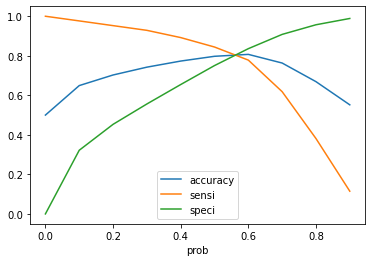

In [170]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [171]:
# From Above plot we can see final cutoff as .6
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.6 else 0)
y_train_pred_final.head()

,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0.145603,1,1,0,0,0,0,0,0,0,0,0
1,0.222768,1,1,1,0,0,0,0,0,0,0,0
2,0.441560,1,1,1,1,1,0,0,0,0,0,0
3,0.254413,1,1,1,0,0,0,0,0,0,0,0
4,0.000694,1,0,0,0,0,0,0,0,0,0,0


In [172]:
# confusion matrices
conf = confusion_matrix(y_train, y_train_pred_final.predicted)
conf

array([[16040,  3147],
       [ 4257, 14930]], dtype=int64)

In [173]:
#accuracy of model
metrics.accuracy_score(y_train, y_train_pred_final.predicted)

0.8070568614165842

In [175]:
TP = conf[1,1] # true positive 
TN = conf[0,0] # true negatives
FP = conf[0,1] # false positives
FN = conf[1,0] # false negatives

In [187]:
# Let's see the sensitivity of our logistic regression model
print("sensitivity", TP / float(TP+FN))
# Let us calculate specificity
print("specificity",TN / float(TN+FP))

sensitivity 0.6882276843467011
specificity 0.8379297776697849


#### Logistic Regression on Test data

In [182]:
col = X_train_rfe.columns.to_list()
X_test_sm=sm.add_constant(X_test[col])
# Predict the target variable
y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame()
y_test_pred_final['Churn_Prob'] =y_test_pred
y_test_pred_final.head()

,Churn_Prob
39713,0.362325
80955,0.969455
80034,0.002546
93911,0.155463
55461,0.202079


In [183]:
# y predicted by using cutoff rom train model that .6
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.6 else 0)
y_test_pred_final.head()

,Churn_Prob,predicted
39713,0.362325,0
80955,0.969455,1
80034,0.002546,0
93911,0.155463,0
55461,0.202079,0


In [184]:
# confusion matrices
conf = confusion_matrix(y_test, y_test_pred_final.predicted)
conf

array([[6897, 1334],
       [ 241,  532]], dtype=int64)

In [185]:
TP = conf[1,1] # true positive 
TN = conf[0,0] # true negatives
FP = conf[0,1] # false positives
FN = conf[1,0] # false negatives

In [189]:
#accuracy of model
metrics.accuracy_score(y_test, y_test_pred_final.predicted)

0.8250777432252332

In [188]:
# Let's see the sensitivity of our logistic regression model
print("sensitivity", TP / float(TP+FN))
# Let us calculate specificity
print("specificity",TN / float(TN+FP))

sensitivity 0.6882276843467011
specificity 0.8379297776697849


In [190]:
# We can see the sensitivity ,accuracy and specificity is almost same for train and test model

In [193]:
# Final Logistic Model
X_train_sm=sm.add_constant(X_train_rfe)
log=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=log.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38357
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17876.
Date:                Wed, 03 Nov 2021   Deviance:                       35753.
Time:                        23:18:54   Pearson chi2:                 2.13e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.3600      0

In [ ]:
#  important feature having impact on churn
1. loc_ic_mou_8
2. offnet_mou_8
3. onnet_mou_8
4. std_og_mou_7
5. loc_ic_mou_7 

# Final Observations 
1. std rates are negatively impacting the Churn rate . which implies company need to pay attention to their std charges
2. For 8th month and 7th month Incoming and Outgoing Calls on romaing Features are strong indicators of churn behaviour
3. 2G/3G services are not good, it's strong indicator of churn behaviour.